Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [24]:
! export PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python


In [5]:
! pip install numpy==1.20.3

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras

from tensorflow.keras import layers,models
#from tensorflow.contrib.keras.python.keras.models import Sequential
from tensorflow.keras.models import Sequential

2024-10-27 11:05:41.615361: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [ ]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [2]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Train")
data_dir_test = pathlib.Path('Test')

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [4]:
batch_size = 4
img_height = 180
img_width = 180
seed = 123

Use 80% of the images for training, and 20% for validation.

In [5]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed = seed,
    image_size = (img_height, img_width),  # Resize images to fixed size
    batch_size = batch_size,
    label_mode='categorical'  # For multiclass classification
)

Found 2239 files belonging to 9 classes.


2024-10-27 11:05:55.404871: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-10-27 11:05:55.406330: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-10-27 11:05:55.568406: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-10-27 11:05:55.568440: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (msi-crosshair): /proc/driver/nvidia/version does not exist
2024-10-27 11:05:55.571691: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-27 11:0

In [6]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    seed = seed,
    image_size=(img_height, img_width),  # Resize images to fixed size
    batch_size=batch_size,
    label_mode='categorical'  # For multiclass classification
)

Found 118 files belonging to 9 classes.


In [7]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [27]:
import matplotlib.pyplot as plt
#tf.config.run_functions_eagerly(True)

# Create a function to visualize one image from each class
def visualize_classes(dataset, num_classes=9):
    plt.figure(figsize=(10, 10))
    count = 0
    
    for images, labels in dataset.take(1):
        for i in range(num_classes):
            # Find the first instance of the current class
            index = np.where(labels.numpy() == i)[0]
            if index.size > 0:
                ax = plt.subplot(3, 3, count + 1)
                plt.imshow(images[index[0]].numpy().astype("uint8"))
                plt.title(class_names[i])
                plt.axis("off")
                count += 1
                
    plt.show()

# Visualize one instance of each class
visualize_classes(train_ds)



RuntimeError: __iter__() is only supported inside of tf.function or when eager execution is enabled.

<Figure size 1000x1000 with 0 Axes>

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [24]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

AttributeError: module 'tensorflow' has no attribute 'data'

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [8]:
### Your code goes here
# Create a Sequential model
input_shape = (img_height, img_width, 3)
model = models.Sequential()

# Add a Rescaling layer to normalize pixel values
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape))

# Add convolutional layers and max pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output from the convolutional layers
model.add(layers.Flatten())

# Add dense layers for classification
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(9, activation='softmax'))  # Adjust the number of outputs for your classes


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 128)       0

### Train the model

In [16]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
560/560 [==============================] - 47s 84ms/step - loss: 1.4236 - accuracy: 0.4891 - val_loss: 2.0900 - val_accuracy: 0.3136
Epoch 2/20
560/560 [==============================] - 49s 87ms/step - loss: 1.3565 - accuracy: 0.5226 - val_loss: 2.1447 - val_accuracy: 0.3136
Epoch 3/20
560/560 [==============================] - 58s 104ms/step - loss: 1.3122 - accuracy: 0.5360 - val_loss: 2.4656 - val_accuracy: 0.3220
Epoch 4/20
560/560 [==============================] - 63s 112ms/step - loss: 1.2103 - accuracy: 0.5703 - val_loss: 2.5745 - val_accuracy: 0.3051
Epoch 5/20
560/560 [==============================] - 50s 90ms/step - loss: 1.1593 - accuracy: 0.5855 - val_loss: 3.0683 - val_accuracy: 0.3051
Epoch 6/20
560/560 [==============================] - 46s 82ms/step - loss: 1.1006 - accuracy: 0.6021 - val_loss: 2.9644 - val_accuracy: 0.2712
Epoch 7/20
560/560 [==============================] - 46s 82ms/step - loss: 0.9879 - accuracy: 0.6400 - val_loss: 3.1289 - val_accurac

### Visualizing training results

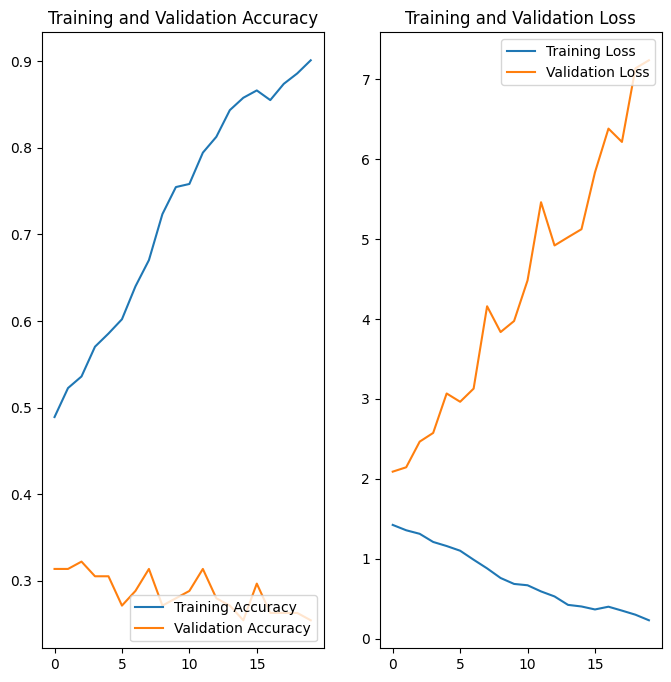

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

- Training Loss and Accuracy: Your model achieved a training loss of 0.2303 and a high training accuracy of 90.13%.
- Validation Loss and Accuracy: However, the validation loss is very high at 7.2375, with a low validation accuracy of only 25.42%.


Analysis


These results indicate overfitting. Here’s why:

- High Training Accuracy vs. Low Validation Accuracy: The model performs very well on the training data but poorly on the validation data, suggesting it has memorized the training samples rather than generalizing well to new, unseen data.
- Large Gap in Loss Values: The significant difference between the low training loss and high validation loss suggests that the model is highly specialized to the training dataset.